In [35]:
#Kimia Arjmand 4003623001
#Maryam Hoseinpoor 4003623012

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 

In [36]:
df = pd.read_csv(r"C:\Users\Tank.bnd\Desktop\AI_project\search-blaster\Flight_Price_Dataset_Q2.csv")
df

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585


In [37]:
departure_time_map = {
    'Early_Morning': 1,
    'Morning': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Night': 5,
    'Late_Night': 6
    
}
df['departure_time'] = df['departure_time'].map(departure_time_map)

arrival_time_map = {
    'Early_Morning': 1,
    'Morning': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Night': 5,
    'Late_Night': 6
}
df['arrival_time'] = df['arrival_time'].map(arrival_time_map)

stops_map = {
    'zero': 0,
    'one': 1,
    'two_or_more':2
}
df['stops'] = df['stops'].map(stops_map)

class_map = {
    'Economy': 1,
    'Business': 2
}
df['class'] = df['class'].map(class_map)

In [64]:
def gradient_function(X_train, y_train, w, b):
    m,n = X_train.shape           
    error = (np.dot(X_train,w) + b) - y_train
    cost = (1/2*m)*np.dot(error.T,error)
    dj_dw = np.dot(X_train.T,error) / m
    return dj_dw, cost
        

def gradient_descent(X_train, y_train, w, b, alpha, iters):
    cost_array = np.zeros(iters)
    for i in range(iters):
        dj_dw, cost = gradient_function(X_train= X_train, y_train= y_train, w= w, b= b) 
        w = w - (alpha * dj_dw)
        cost_array[i] = cost
    return w, cost_array

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df[['departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left']], df['price'], test_size=0.2, shuffle=True)

X_train = (X_train - X_train.mean())/X_train.std()

#add a column one at start 
X_train = np.c_[np.ones(X_train.shape[0]), X_train] 

alpha = 0.01
iters = 1000
w = np.zeros(X_train.shape[1])
b = 0.
start_time = time.time()
w, cost_array  = gradient_descent(X_train= X_train, y_train= y_train,w= w, b=b, alpha= alpha,iters= iters)
end_time = time.time()
print(w)

[20913.01356547   -54.06817335  2350.43422954   411.41198051
 21198.86528      589.84624394 -1777.74750181]


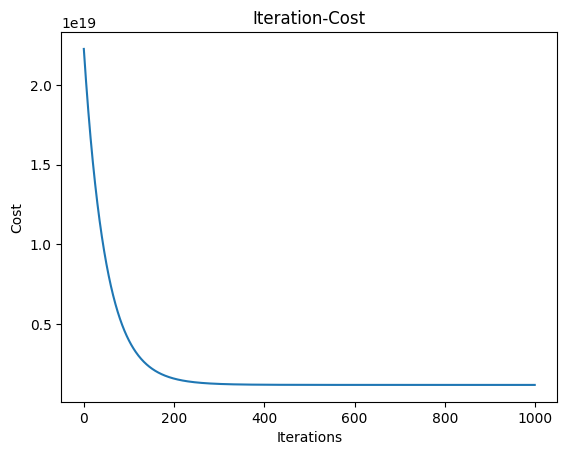

In [67]:
plt.plot(np.arange(iters), cost_array) 
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.title('Iteration-Cost') 
plt.show()
  

In [41]:
X_test = (X_test - X_test.mean())/X_test.std()
X_test = np.c_[np.ones(X_test.shape[0]), X_test] 
y_pred = np.dot(X_train,w)
y_test_pred = np.dot(X_test,w)

In [42]:
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)
print(MSE)
print(RMSE)
print(MAE)
print(R2)

50932214.471653834
7136.680914238344
4605.387817465647
0.9011931098884863


In [43]:
f = open("Blaster-UIAI4021-PR1-Q2.txt", "w")
f.write("PRICE = {} + {}(departure_time) + {}(stops) + {}(arrival_time) + {}(class) + {}(duration) + {}(days_left)".format(w[0],w[1],w[2],w[3],w[4],w[5],w[6]))
f.write("\nTraining Time: {}s\n".format(end_time-start_time))
f.write("\nLogs:"
        "\nMSE: {}" 
        "\nRMSE: {}"
        "\nMAE: {}"
        "\nR2: {}".format(MSE, RMSE, MAE, R2))
f.close()